군집 분석(Cluster Analysis)
   - 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
   - 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
   - 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

텍스트 유사도
   - 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
   - 자카드 유사도(Jaccard Similarity) : 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
   - 코사인 유사도(Cosine Similarity) : 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [46]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# 자카드 유사도 만들기
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))
    
    return inter/union

In [48]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [49]:
import warnings
warnings.filterwarnings('ignore')

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()


print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


데이터 전처리 
   - 네이버 영화 리뷰 : https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [53]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [54]:
# 형태소 분석하기
from konlpy.tag import Mecab

tagger = Mecab('C:Mecab/mecab-ko-dic')
reviews = [tagger.morphs(x) for x in reviews]

print(reviews[:5])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.']]


Word2Vec 생성

   - word2vec 생성에 필요한 라이브러리들 추가

In [55]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

   - Word2Vec 모델 생성
   - gensim의 Word2Vec은 선언과 동시에 학습을 해 단어 백터들을 생성

In [56]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [57]:
word2vec.wv.most_similar('영화')   # 영화에 대해서 유사한 단어 리스트 출력

[('듯', 0.9279124140739441),
 ('작품', 0.9270927906036377),
 ('마음', 0.9019488096237183),
 ('표현', 0.8877230882644653),
 ('이야기', 0.885176420211792),
 ('가슴', 0.885072648525238),
 ('따뜻', 0.8835733532905579),
 ('느낌', 0.881941020488739),
 ('전해', 0.8771079778671265),
 ('잔잔', 0.8768113255500793)]

   - t-sne을 이용한 단어 백터 시각화

In [58]:
# TSNE가 뭘까요...?
tsne = TSNE(n_components=2)
tsne

TSNE()

In [61]:
vocab = word2vec.wv.key_to_index
similarity = word2vec.wv[vocab]
similarity

array([[-0.17391308,  0.69476295,  0.21607415, ..., -0.24752969,
         0.00464104, -0.3434335 ],
       [-0.12496713,  0.23464112, -0.16058388, ..., -0.6567173 ,
         0.11565064, -0.193193  ],
       [ 0.21669923,  0.13883178, -0.28741902, ..., -0.4552229 ,
         0.48690087, -0.43504634],
       ...,
       [ 0.00727134,  0.02770888, -0.00682704, ..., -0.05186034,
         0.03384779, -0.00206902],
       [-0.01376812,  0.03191795, -0.01251382, ..., -0.0385693 ,
         0.03892954, -0.02840438],
       [ 0.01212461,  0.0218417 ,  0.00151243, ..., -0.02409943,
         0.01305618, -0.01653878]], dtype=float32)

In [63]:
# vocab 시각화 (pandas)
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
print(df[:30])

            x          y
.  -20.795984 -65.663696
이  -40.351780 -62.148960
는  -43.291706 -61.033096
영화 -36.397438 -59.277836
다  -21.827486 -66.975166
고  -31.534462 -73.028404
의  -43.433525 -56.656353
하  -36.687893 -71.313583
을  -43.482521 -60.516918
에  -42.378471 -54.610821
가  -39.461369 -60.065105
은  -41.352299 -60.891022
!  -15.730437 -74.021713
도  -24.964609 -64.192184
보  -34.050526 -72.744026
게  -30.769882 -72.976807
한  -43.020569 -58.392426
있  -43.123238 -66.652275
,  -39.986237 -52.905422
들  -42.612598 -57.972355


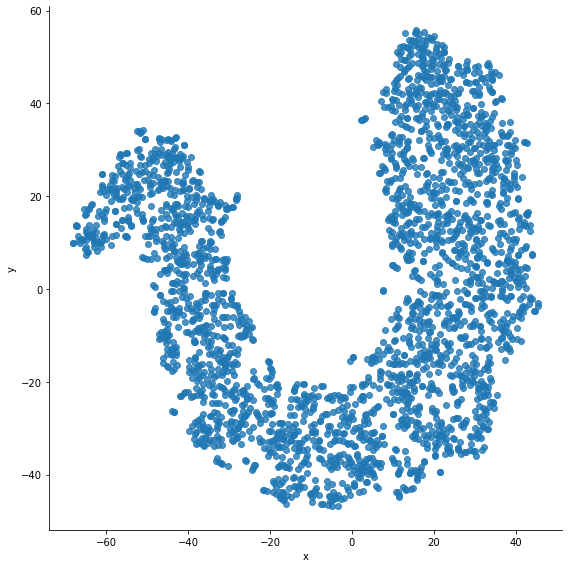

In [36]:
# vocab 시각화 2 (seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot('x','y', data=df, fit_reg=False, size=8)
plt.show()

Scikit-learn, Scipy를 이용한 계층적 군집화

   - 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
   - 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
   - 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

Scikit-learn

   - 비계층적 군집화의 일종인 agglomerativeClustering(병합군집)을 이용, 계층적 군집화 실습
   - 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
   - 병합 군집의 종료 조건에는 3가지를 지정 가능
      - 1. ward : 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
      - 2. average : 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
      - 3. complete : 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

   - ward(Default)

In [ ]:
from sklearn.cluster import AgglomerativeClusterings

ward = AgglomerativeClusterings(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict